# **Importing Libraries**

**Basic Libraries**

In [179]:
import pandas as pd
import numpy as np

**Libraries for visualisation and analysis**

In [180]:
#libraries used for statistical graphics in python
import matplotlib.pyplot as plt

**Data Preprocessing Libraries**

In [181]:
#Libraries used for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# **Importing Models**

In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor,MultiTaskLasso,MultiTaskElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor


#for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Data Analysis**

**Reading the Data**

In [183]:
Alloy_data_path = r"https://raw.githubusercontent.com/DarshanGoodGuy/IITISOC25/refs/heads/main/final_dataset1.csv"
Alloy_data = pd.read_csv(Alloy_data_path)

**Analysing the Data**

In [184]:
Alloy_data.head()

,FORMULA,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,...,Ca,Y,Pd,Sc,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,Co1 Cr1 Fe1 Ni1,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,274.0,708.0,39.0,226.0
1,Co1 Cr1 Mn1 Ni1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.1,25.0,282.0,694.0,44.0,222.0
2,Co1 Cr1 Ni1,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.3,25.0,300.0,860.0,60.0,231.0
3,Co1 Fe1 Mn1 Ni1,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,170.0,550.0,41.0,204.0
4,Co1 Fe1 Ni1,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.5,25.0,211.0,513.0,31.0,207.0


In [185]:
Alloy_data.shape

(947, 33)

In [186]:
Alloy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   FORMULA                                   947 non-null    object 
 1   Co                                        389 non-null    float64
 2   Cr                                        477 non-null    float64
 3   Fe                                        428 non-null    float64
 4   Ni                                        449 non-null    float64
 5   Mn                                        132 non-null    float64
 6   Nb                                        447 non-null    float64
 7   Ti                                        486 non-null    float64
 8   Al                                        344 non-null    float64
 9   C                                         19 non-null     float64
 10  Mo                                    

**Filling the missing values with mean**

In [187]:
Alloy_data.isna().sum()

,0
FORMULA,0
Co,558
Cr,470
Fe,519
Ni,498
Mn,815
Nb,500
Ti,461
Al,603
C,928


In [188]:
Alloy_data.iloc[:, -4:] = Alloy_data.iloc[:, -4:].fillna(Alloy_data.iloc[:, -4:].mean())
Alloy_data.head()

,FORMULA,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,...,Ca,Y,Pd,Sc,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,Co1 Cr1 Fe1 Ni1,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,274.0,708.0,39.0,226.0
1,Co1 Cr1 Mn1 Ni1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.1,25.0,282.0,694.0,44.0,222.0
2,Co1 Cr1 Ni1,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.3,25.0,300.0,860.0,60.0,231.0
3,Co1 Fe1 Mn1 Ni1,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,170.0,550.0,41.0,204.0
4,Co1 Fe1 Ni1,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.5,25.0,211.0,513.0,31.0,207.0


In [189]:
Alloy_data.isna().sum()

,0
FORMULA,0
Co,558
Cr,470
Fe,519
Ni,498
Mn,815
Nb,500
Ti,461
Al,603
C,928


# **Data Standardisation**

In [190]:
Alloy_data.shape

(947, 33)

In [191]:
#Assigning Feature and Target variables
X = Alloy_data.iloc[:,1:27] #Feature Columns
y = Alloy_data.iloc[:,27:33]  #Target Columns

In [192]:
X.head()

,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,Mo,...,Zn,Ta,Zr,Hf,W,Re,Ca,Y,Pd,Sc
0,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
y.head()

,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,8.2,25.0,274.0,708.0,39.0,226.0
1,8.1,25.0,282.0,694.0,44.0,222.0
2,8.3,25.0,300.0,860.0,60.0,231.0
3,8.2,25.0,170.0,550.0,41.0,204.0
4,8.5,25.0,211.0,513.0,31.0,207.0


**Scaling of data**

In [194]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
columns_to_scale = ['PROPERTY: Calculated Density (g/cm$^3$)', 'PROPERTY: Test temperature ($^\circ$C)', 'PROPERTY: YS (MPa)', 'PROPERTY: UTS (MPa)','PROPERTY: Elongation (%)','PROPERTY: Calculated Young modulus (GPa)']
X_scaled = X_scaled.fillna(0)
y_scaled = y.copy()
y_scaled[columns_to_scale] = sc.fit_transform(y[columns_to_scale])

In [195]:
X_scaled.head()

,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,Mo,...,Zn,Ta,Zr,Hf,W,Re,Ca,Y,Pd,Sc
0,0.392247,0.530344,0.432264,0.452454,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.394086,0.532722,0.000000,0.454576,0.583150,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.542211,0.724192,0.000000,0.625437,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.386380,0.000000,0.425798,0.445687,0.571841,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.528777,0.000000,0.582723,0.609941,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
y_scaled.head()

,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,0.552846,0.157213,0.086124,0.159245,0.371429,0.681416
1,0.544715,0.157213,0.089069,0.155695,0.419048,0.663717
2,0.560976,0.157213,0.095694,0.197789,0.571429,0.703540
3,0.552846,0.157213,0.047847,0.119180,0.390476,0.584071
4,0.577236,0.157213,0.062937,0.109798,0.295238,0.597345


In [197]:
y_scaled.columns

Index(['PROPERTY: Calculated Density (g/cm$^3$)',
       'PROPERTY: Test temperature ($^\circ$C)', 'PROPERTY: YS (MPa)',
       'PROPERTY: UTS (MPa)', 'PROPERTY: Elongation (%)',
       'PROPERTY: Calculated Young modulus (GPa)'],
      dtype='object')

In [198]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(681, 26), (681, 6)], [(171, 26), (171, 6)], [(95, 26), (95, 6)])

In [199]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (681, 26) (681, 6)
Validation set shape: (171, 26) (171, 6)
Test set shape: (95, 26) (95, 6)


In [200]:
y_Test = sc.inverse_transform(y_test)
actual_Calculated_Density = np.transpose(y_Test)[0]
actual_Test_Temperature = np.transpose(y_Test)[1]
actual_YS = np.transpose(y_Test)[2]
actual_UTS = np.transpose(y_Test)[3]
actual_Elongation = np.transpose(y_Test)[4]
actual_Calculated_Youngs_Modulus = np.transpose(y_Test)[5]

In [201]:
actual_Calculated_Density

array([ 5.5,  6.9,  7.2, 10. ,  8.3,  9.9,  1.4,  9.9,  5.7,  7.7,  9.9,
       11.8,  6.8,  6.4, 11.1,  7.9,  7.1,  8.1,  6.7,  6.8,  6. ,  7.6,
        8.4,  7.1,  7.1,  7.4,  5.6, 10.9,  6.7,  8.7,  5.9,  5.8,  7.1,
       10. ,  6.6,  8.3,  9.9,  7.8,  6.5,  7.4, 10.8,  5.8,  7.1, 11.8,
        7.2,  7.4,  7.4,  7.8,  9.9, 12.6,  6.6,  9.9,  7.6,  6.8,  6.2,
        8.6,  9.9,  3.2,  8. ,  7.6,  7.8,  8.4,  8.1,  6.9,  7.8,  8.2,
        8.9,  7.6,  8. ,  7.7,  7.4,  8. , 11. ,  9.9,  8. ,  7.6,  6.5,
       10.2, 10. ,  7.1,  7.2,  8. ,  6.7,  5.8,  8.7,  6.5,  8.2,  7.6,
        7.7,  8.6,  7.3,  7.1,  8.5,  5.5,  7.2])

# **Modelling**

**Using various regression models to find the best one**

In [202]:
import xgboost as xgb

def model_results(XTrain,XValid,yTrain,yValid):
  models =[('Random Forest',RandomForestRegressor()),
           ('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           ('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           ('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XValid)
      r2score = r2_score(yValid, model_results)
      RMSE = np.sqrt(mean_squared_error(yValid, model_results))
      MAE = mean_absolute_error(yValid, model_results)
      finalResults.append((name, r2score, RMSE, MAE))

  finalResults.sort(key=lambda k:k[2])
  return finalResults



In [203]:
np.random.seed(42)
np_results = model_results(X_train,X_valid,y_train,y_valid)
results = pd.DataFrame(np_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
results

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.485273,0.121450,0.076184
1,Random Forest,0.488808,0.122150,0.069909
2,X_gb,0.436836,0.127753,0.069063
3,Support Vector,0.428207,0.127862,0.094852
4,KNN,0.377956,0.134287,0.090114
5,Decision Tree,0.348493,0.137056,0.072546
6,AdaBoost,0.335690,0.137637,0.097812
7,MLP,0.329987,0.138825,0.101103
8,RidgeCV,0.325966,0.140780,0.099010
9,SGD,0.220684,0.149583,0.110423


In [204]:
import xgboost as xgb

def model_test_results(XTrain,XTest,yTrain,yTest):
  test_models =[('Linear', LinearRegression()),
           ('Random Forest',RandomForestRegressor()),
           ('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           ('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           ('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in test_models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XTest)
      r2score = r2_score(yTest, model_results)
      RMSE = np.sqrt(mean_squared_error(yTest, model_results))
      MAE = mean_absolute_error(yTest, model_results)
      finalResults.append((name, r2score, RMSE, MAE))
  finalResults.sort(key=lambda k:k[2])
  return finalResults


In [205]:
np.random.seed(42)
np__test_results = model_test_results(X_train,X_test,y_train,y_test)
test_results = pd.DataFrame(np__test_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
test_results

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.485749,0.122274,0.074644
1,Random Forest,0.477386,0.123285,0.069215
2,X_gb,0.404201,0.128412,0.068556
3,KNN,0.438651,0.131230,0.084604
4,Support Vector,0.403785,0.132873,0.095055
5,Decision Tree,0.288861,0.138122,0.073207
6,MLP,0.332185,0.139378,0.099785
7,AdaBoost,0.256086,0.143456,0.100926
8,RidgeCV,0.319023,0.144494,0.099943
9,Linear,0.317762,0.144743,0.099445


In [206]:
names = []
r2score = []
rmse = []
mae = []
for model in np_results:
  names.append(model[0])
  r2score.append(model[1])
  rmse.append(model[2])
  mae.append(model[3])

r2 score comparison

Text(0.5, 1.0, 'r2score comparison')

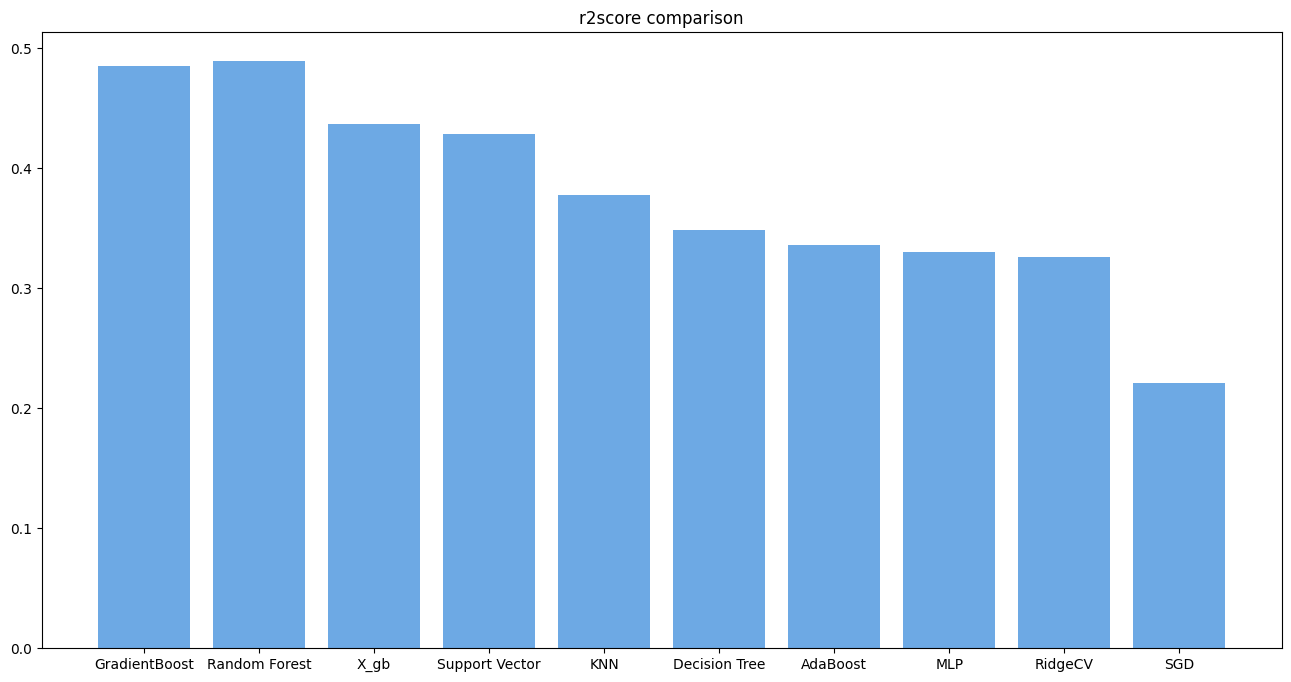

In [207]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,r2score,width=0.8,color='#6DA9E4')
plt.title('r2score comparison')

rmse comparison

Text(0.5, 1.0, 'rmse comparison')

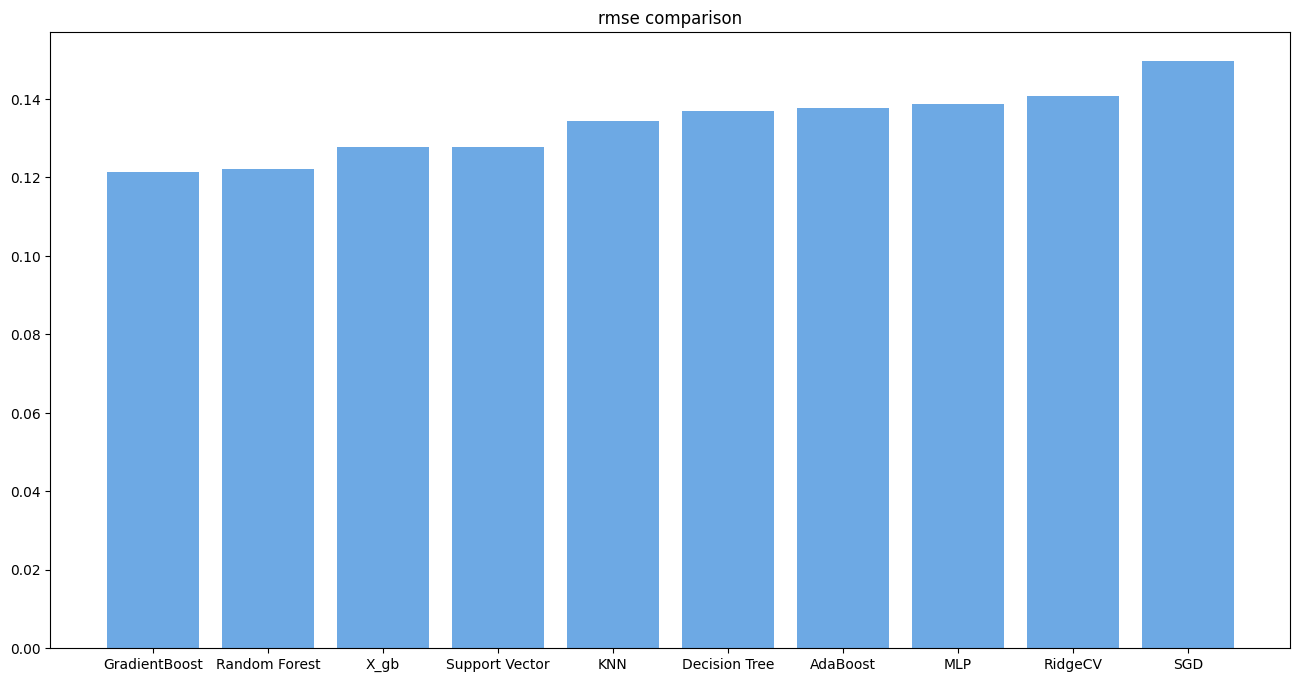

In [208]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,rmse,width=0.8,color='#6DA9E4')
plt.title('rmse comparison')

mae comparison

Text(0.5, 1.0, 'mae comparison')

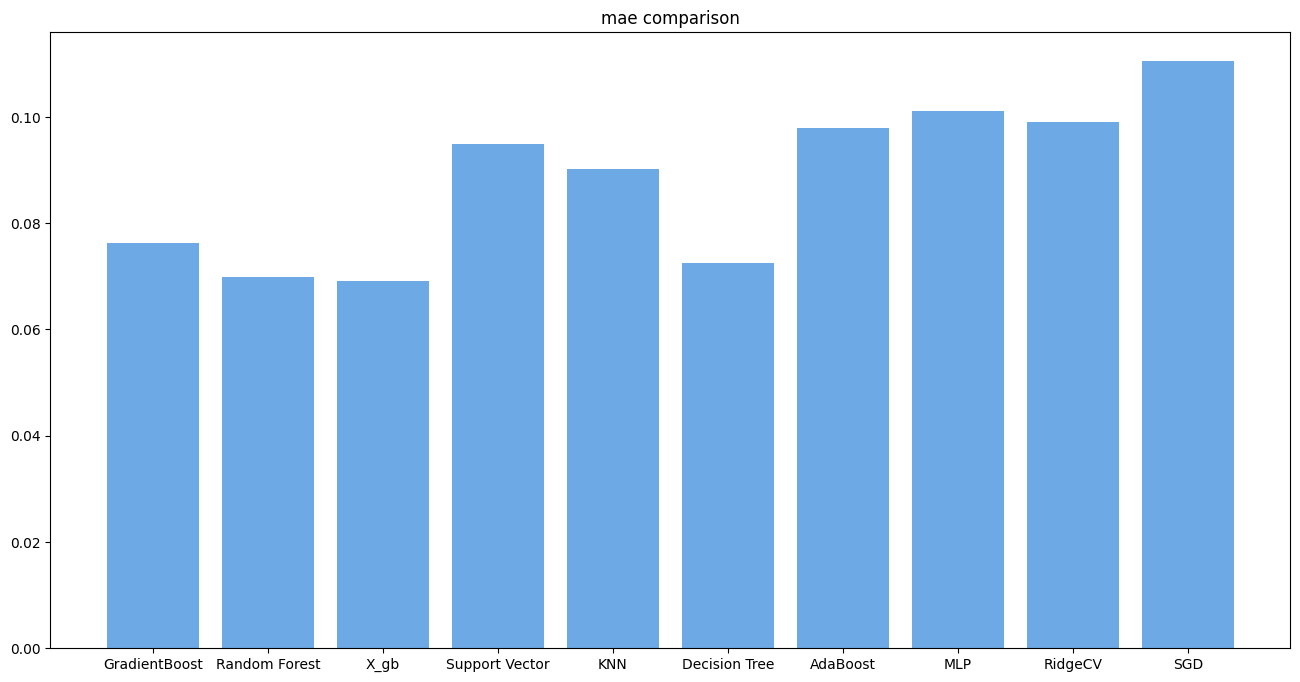

In [209]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,mae,width=0.8,color='#6DA9E4')
plt.title('mae comparison')

In [210]:
Final_models = results.iloc[:1, :]
Final_models

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.485273,0.12145,0.076184


Regression using Neural Network

In [211]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [212]:
model = Sequential()
model.add(Dense(128, input_dim=26, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(6, activation='linear'))

model.compile(loss=keras.losses.mse,
                 optimizer=keras.optimizers.Adam(),
                 metrics=["mse"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [213]:
history = model.fit(X_train, y_train, batch_size = 128, shuffle=True, epochs=500)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1723 - mse: 0.1723
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0544 - mse: 0.0544
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0318 - mse: 0.0318
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0308 - mse: 0.0308 
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0238 - mse: 0.0238 
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0218 - mse: 0.0218 
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0222 - mse: 0.0222 
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207 - mse: 0.0207 
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 - mse: 0.0201 
Epoch 10/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0202 - mse: 0.0202  
Epoch 11/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0197 - mse: 0.0197  
Epoch 12/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0210 - mse: 0.0210 
Epoch 13/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

In [214]:
y_pred = model.predict(X_valid)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [254]:
NN_res = {'Model Name':'Neural Network',	'R2 Score':	r2_score(y_valid, y_pred),'RMSE':np.sqrt(mean_squared_error(y_valid, y_pred)), 'MAE':mean_absolute_error(y_valid, y_pred)}

In [256]:
Final_models = pd.concat([Final_models, pd.DataFrame([NN_res])], ignore_index=True)

In [257]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.485273,0.121450,0.076184
1,Neural Network,0.457841,0.125333,0.082664


In [258]:
NN_test_y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [260]:
NN_Final_results = {'r2score':r2_score(y_test,NN_test_y_pred),'rmse':np.sqrt(mean_squared_error(y_test,NN_test_y_pred)),'mae':mean_absolute_error(y_test,NN_test_y_pred)}
NN_Final_results

{'r2score': 0.46946653723716736,
 'rmse': np.float64(0.12516281580996105),
 'mae': 0.08198490738868713}

# Boosting Parameters

**learning_rate**

In [215]:
def parameter_LR(XTrain,yTrain,XValid,yValid):
  LR = [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.55,0.573,0.5,0.6,0.7,0.8,0.9,1]
  Results = []
  for lr in LR:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = lr))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((lr, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['LR', 'R2 Score', 'RMSE', 'MAE'])

In [216]:
Results_LR = parameter_LR(X_train,y_train,X_valid,y_valid)
Results_LR

,LR,R2 Score,RMSE,MAE
0,0.1000,0.483885,0.121559,0.076213
1,0.2000,0.466865,0.123121,0.073325
2,0.3000,0.425175,0.127903,0.072825
3,0.4000,0.414549,0.128702,0.072418
4,0.5000,0.425959,0.128918,0.072452
5,0.5500,0.407006,0.130748,0.073425
6,0.5730,0.412560,0.130994,0.073194
7,0.6000,0.398455,0.131226,0.073367
8,0.7000,0.396376,0.132160,0.073745
9,0.8000,0.370624,0.133996,0.074490


In [217]:
best_LR = Results_LR.iloc[0,0]
best_LR

np.float64(0.1)

**n_estimators**

In [218]:
def parameter_estimator(XTrain,yTrain,XValid,yValid):
  estimators = [100,200,300,400,500,700,1000]
  Results = []
  for estimator in estimators:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1,learning_rate = best_LR,n_estimators = estimator))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    r2score = r2_score(y_valid,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_valid,y_pred))
    MAE = mean_absolute_error(y_valid,y_pred)
    Results.append((estimator, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['estimator', 'R2 Score', 'RMSE', 'MAE'])

In [219]:
Results_estimator = parameter_estimator(X_train,y_train,X_valid,y_valid)
Results_estimator

,estimator,R2 Score,RMSE,MAE
0,100,0.483885,0.121559,0.076213
1,200,0.466990,0.123377,0.073372
2,300,0.449200,0.125185,0.071838
3,400,0.435025,0.126946,0.071539
4,500,0.425049,0.128212,0.071624
5,700,0.415633,0.129357,0.071420
6,1000,0.409086,0.130196,0.071310


In [220]:
best_n_estimator = Results_estimator.iloc[0,0]
best_n_estimator

np.int64(100)

**subsample**

In [221]:
def parameter_subsample(XTrain,yTrain,XValid,yValid):
  samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
  Results = []
  for x in samples:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator, subsample = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['subsample', 'R2 Score', 'RMSE', 'MAE'])

In [222]:
Results_subsample = parameter_subsample(X_train,y_train,X_valid,y_valid)
Results_subsample

,subsample,R2 Score,RMSE,MAE
0,0.6,0.495686,0.120397,0.075211
1,0.9,0.485045,0.121403,0.074882
2,1.0,0.483885,0.121559,0.076213
3,0.3,0.474121,0.122262,0.078197
4,0.8,0.478620,0.122290,0.075926
5,0.7,0.477492,0.122582,0.076266
6,0.5,0.469698,0.123378,0.077264
7,0.4,0.470660,0.123603,0.077064
8,0.1,0.462686,0.125203,0.084678
9,0.2,0.459861,0.125389,0.081717


In [223]:
best_subsample= Results_subsample.iloc[0,0]
best_subsample

np.float64(0.6)

# Tree-Based Parameters

**min_samples_split**

In [224]:
def parameter_split(XTrain,yTrain,XValid,yValid):
  splits = [2,3,4,5,6,7,8,9,10]
  Results = []
  for x in splits:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['min_sample_split', 'R2 Score', 'RMSE', 'MAE'])

In [225]:
Results_split = parameter_split(X_train,y_train,X_valid,y_valid)
Results_split

,min_sample_split,R2 Score,RMSE,MAE
0,8,0.492144,0.120476,0.075473
1,10,0.491912,0.120480,0.075468
2,9,0.485805,0.121061,0.075504
3,7,0.487654,0.121225,0.075755
4,2,0.483885,0.121559,0.076213
5,6,0.484419,0.121661,0.076197
6,4,0.481223,0.121698,0.076196
7,3,0.480876,0.121864,0.076260
8,5,0.479660,0.122114,0.076426


In [226]:
best_split= Results_split.iloc[0,0]
best_split

np.int64(8)

**max_leaf_nodes**

In [227]:
def parameter_nodes(XTrain,yTrain,XValid,yValid):
  nodes = [2,3,4,5,6,7,8,9,10]
  Results = []
  for x in nodes:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split, max_leaf_nodes = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['max_leaf_nodes', 'R2 Score', 'RMSE', 'MAE'])

In [228]:
Results_nodes = parameter_nodes(X_train,y_train,X_valid,y_valid)
Results_nodes

,max_leaf_nodes,R2 Score,RMSE,MAE
0,8,0.492530,0.120430,0.075451
1,9,0.492530,0.120430,0.075451
2,10,0.492530,0.120430,0.075451
3,7,0.490524,0.120671,0.076216
4,5,0.488923,0.121120,0.077692
5,6,0.485228,0.121371,0.077037
6,4,0.478814,0.122254,0.079672
7,3,0.459831,0.124837,0.084143
8,2,0.402370,0.132029,0.092552


In [229]:
best_ln = Results_nodes.iloc[0,0]
best_ln

np.int64(8)

# Miscellaneous Parameters

**loss**

In [231]:
def parameter_loss(XTrain,yTrain,XValid,yValid):
  losses = ["squared_error","absolute_error","huber","quantile"]
  Results = []
  for x in losses:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln , loss = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['Loss', 'R2 Score', 'RMSE', 'MAE'])

In [232]:
Results_loss = parameter_loss(X_train,y_train,X_valid,y_valid)

In [233]:
Results_loss

,Loss,R2 Score,RMSE,MAE
0,squared_error,0.492530,0.120430,0.075451
1,huber,0.481980,0.121803,0.074316
2,absolute_error,0.351719,0.139523,0.076298
3,quantile,-0.654977,0.223912,0.164581


In [234]:
best_loss = Results_loss.iloc[0,0]
best_loss

'squared_error'

criterion

In [235]:
def parameter_criterion(XTrain,yTrain,XValid,yValid):
  criterion = ['friedman_mse', 'squared_error']
  Results = []
  for x in criterion:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['subsample', 'R2 Score', 'RMSE', 'MAE'])


In [236]:
Results_criterion = parameter_criterion(X_train,y_train,X_valid,y_valid)

In [237]:
Results_criterion

,subsample,R2 Score,RMSE,MAE
0,squared_error,0.492683,0.120411,0.075424
1,friedman_mse,0.492530,0.120430,0.075451


In [238]:
best_criterion = Results_criterion.iloc[0,0]
best_criterion

'squared_error'

# **GB Tuned Results**

**GB Tuned Parameters:**

In [239]:
print("Learning_Rate: ",best_LR)
print("n_estimator: ",best_n_estimator)
print("min_samples_split: ",best_split)
print("max_leaf_nodes: ",best_ln)
print("loss: ", best_loss)
print("Criterion: ",best_criterion)

Learning_Rate:  0.1
n_estimator:  100
min_samples_split:  8
max_leaf_nodes:  8
loss:  squared_error
Criterion:  squared_error


In [240]:
Final_validation_model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = best_criterion))
Final_validation_model.fit(X_train,y_train)
final_validation_pred = Final_validation_model.predict(X_valid)

In [241]:
Final_validation_results = {'r2score':r2_score(y_valid,final_validation_pred),'rmse':np.sqrt(mean_squared_error(y_valid,final_validation_pred)),'mae':mean_absolute_error(y_valid,final_validation_pred)}
Final_validation_results

{'r2score': 0.4926832541651202,
 'rmse': np.float64(0.12041131723570597),
 'mae': 0.07542401377884479}

# **Predictions**

In [242]:
Final_model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = best_criterion))
Final_model.fit(X_train,y_train)
final_pred = Final_model.predict(X_test)

In [243]:
Final_results = {'r2score':r2_score(y_test,final_pred),'rmse':np.sqrt(mean_squared_error(y_test,final_pred)),'mae':mean_absolute_error(y_test,final_pred)}
Final_results

{'r2score': 0.484281863366627,
 'rmse': np.float64(0.12228472739404211),
 'mae': 0.07493801654687574}

In [244]:
Final_pred = sc.inverse_transform(final_pred)
GB_Calculated_Density = np.transpose(Final_pred)[0]
GB_Test_temperature = np.transpose(Final_pred)[1]
GB_YS = np.transpose(Final_pred)[2]
GB_UTS = np.transpose(Final_pred)[3]
GB_Elongation = np.transpose(Final_pred)[4]
GB_Calculated_Young_modulus = np.transpose(Final_pred)[5]

In [245]:
Final_pred = pd.DataFrame(Final_pred,columns = y_test.columns)

In [246]:
y_Test = pd.DataFrame(y_Test,columns = y_test.columns)

# **Graphical Visualization**

**Calculated Density**

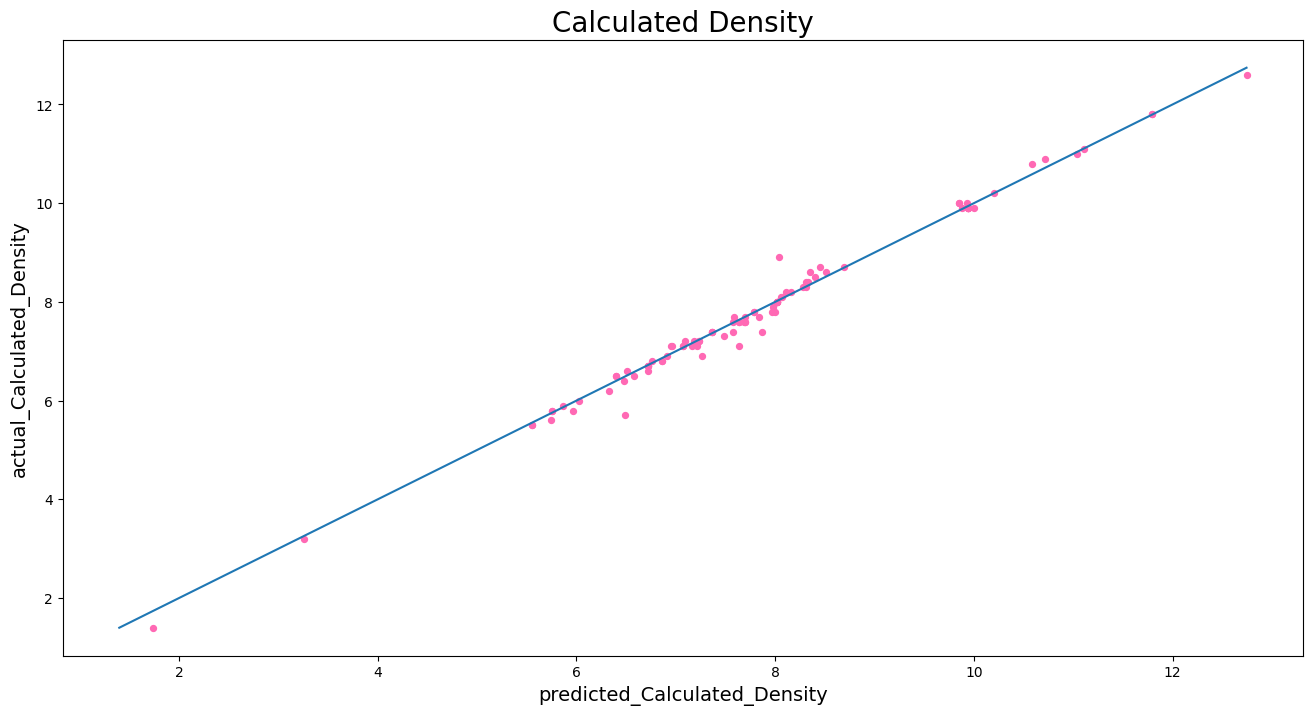

In [247]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Calculated_Density, actual_Calculated_Density, color = 'hotpink', s=18)
x_min = min(GB_Calculated_Density.min(), actual_Calculated_Density.min())
x_max = max(GB_Calculated_Density.max(), actual_Calculated_Density.max())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Calculated Density', fontsize = 20)
ax0.set_xlabel('predicted_Calculated_Density', fontsize = 14)
ax0.set_ylabel('actual_Calculated_Density', fontsize = 14)
plt.show()

**Test Temperature**

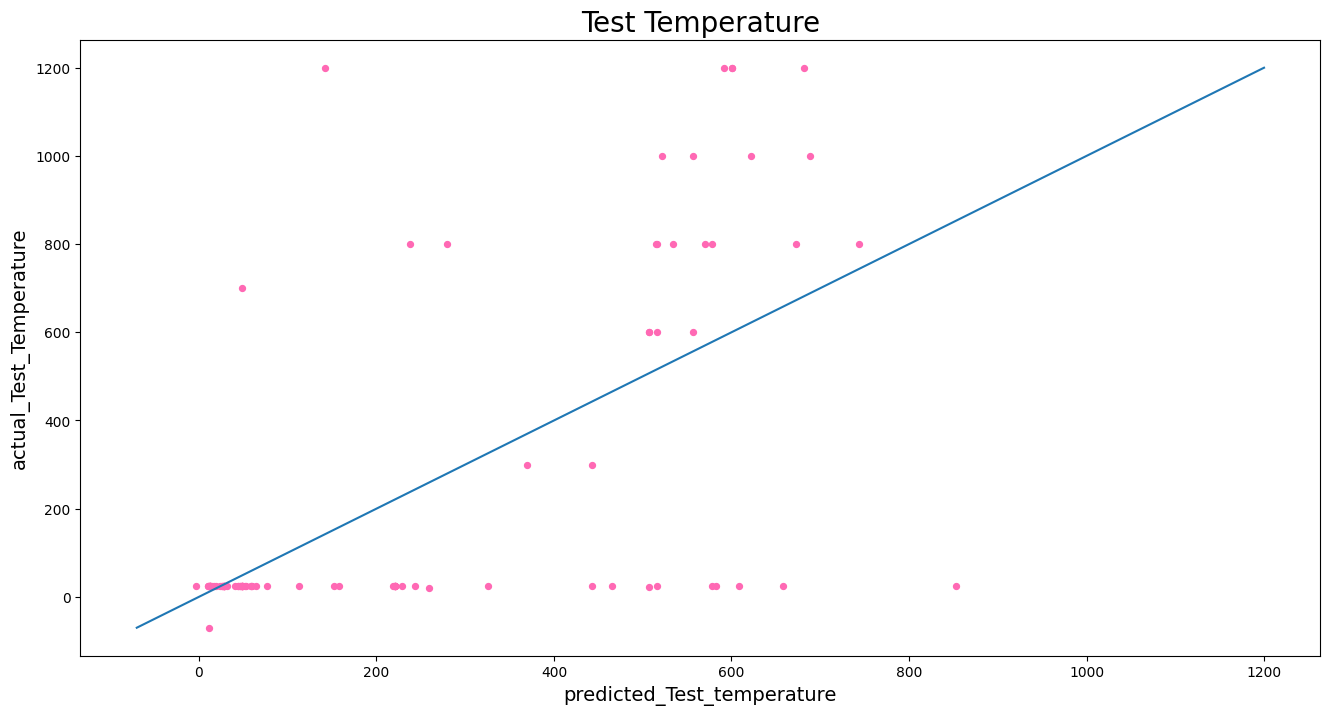

In [248]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Test_temperature, actual_Test_Temperature, color = 'hotpink', s=18)
x_max = max(GB_Test_temperature.max(), actual_Test_Temperature.max())
x_min = min(GB_Test_temperature.min(), actual_Test_Temperature.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Test Temperature', fontsize = 20)
ax0.set_xlabel('predicted_Test_temperature', fontsize = 14)
ax0.set_ylabel('actual_Test_Temperature', fontsize = 14)
plt.show()

**Yield Strength**

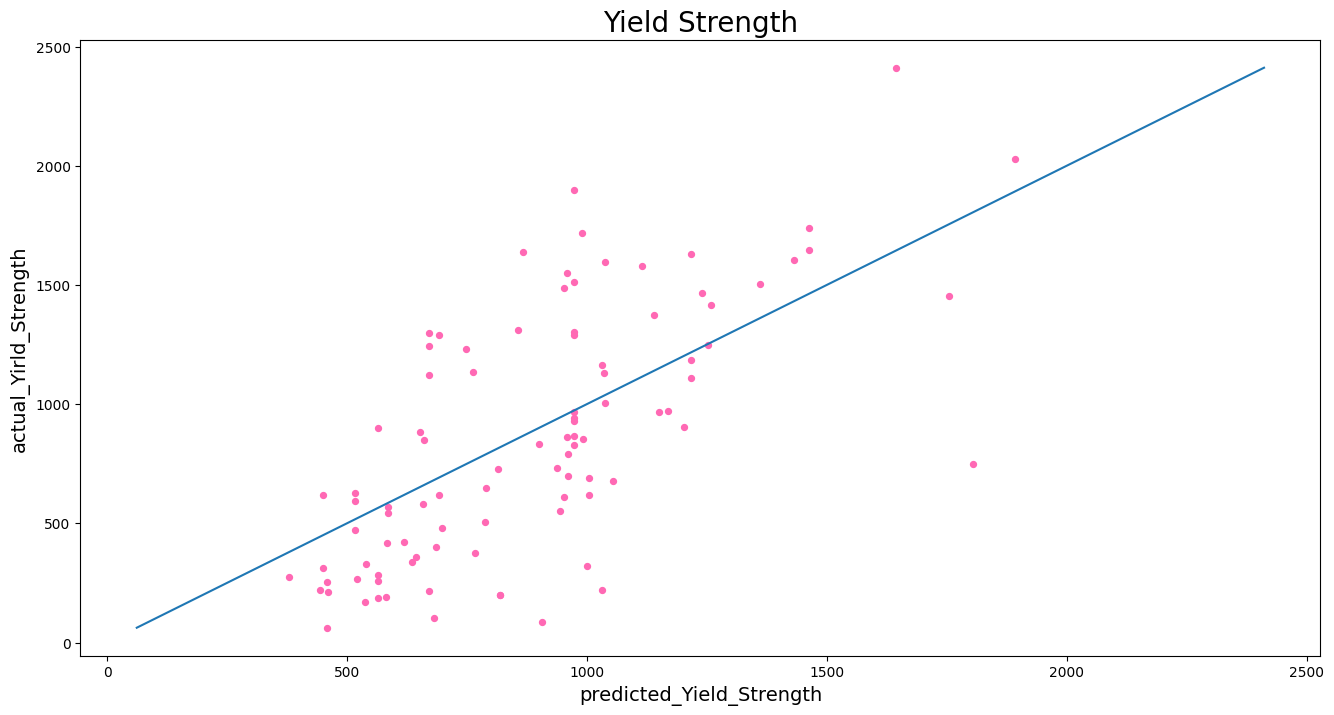

In [249]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_YS, actual_YS, color = 'hotpink', s=18)
x_max = max(GB_YS.max(), actual_YS.max())
x_min = min(GB_YS.min(), actual_YS.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Yield Strength', fontsize = 20)
ax0.set_xlabel('predicted_Yield_Strength', fontsize = 14)
ax0.set_ylabel('actual_Yirld_Strength', fontsize = 14)
plt.show()

**Ultimate Tensile Strength**

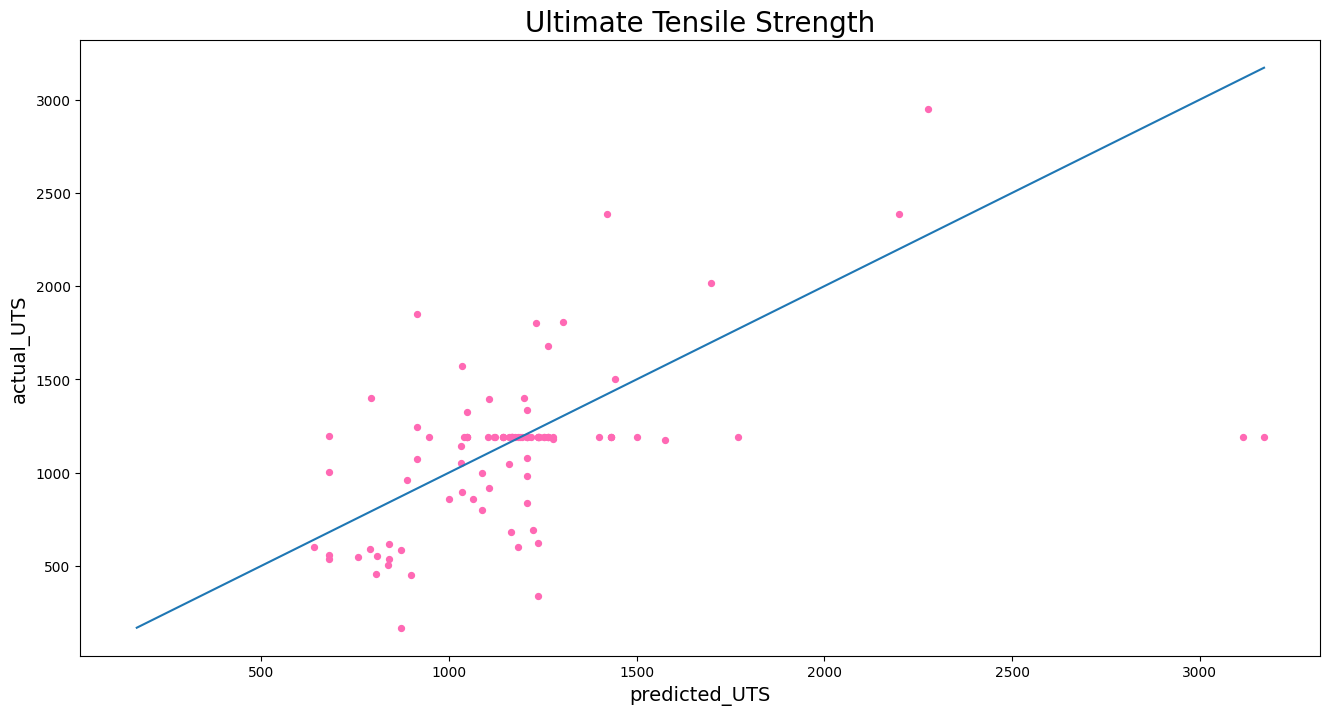

In [250]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_UTS, actual_UTS, color = 'hotpink', s=18)
x_max = max(GB_UTS.max(), actual_UTS.max())
x_min = min(GB_UTS.min(), actual_UTS.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Ultimate Tensile Strength', fontsize = 20)
ax0.set_xlabel('predicted_UTS', fontsize = 14)
ax0.set_ylabel('actual_UTS', fontsize = 14)
plt.show()

**Elongation**

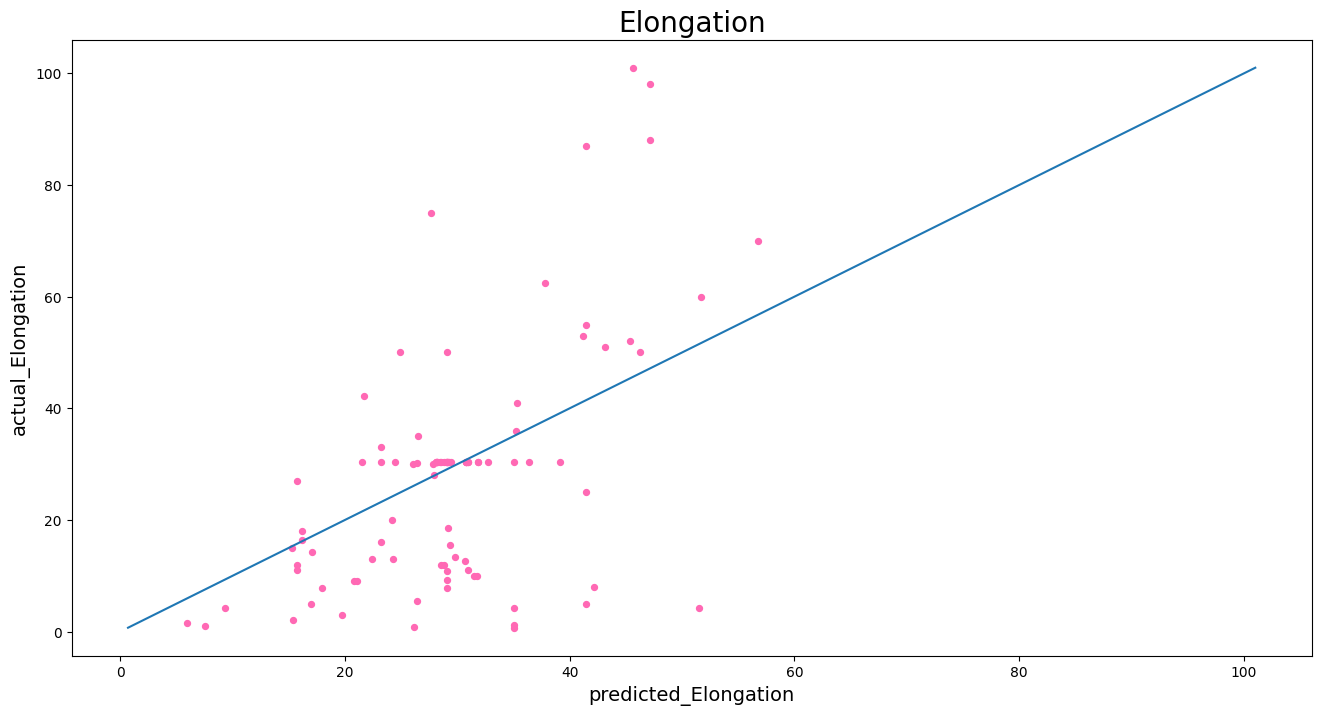

In [251]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Elongation, actual_Elongation, color = 'hotpink', s=18)
x_max = max(GB_Elongation.max(), actual_Elongation.max())
x_min = min(GB_Elongation.min(), actual_Elongation.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Elongation', fontsize = 20)
ax0.set_xlabel('predicted_Elongation', fontsize = 14)
ax0.set_ylabel('actual_Elongation', fontsize = 14)
plt.show()

**Calculated Youngs Modulus**

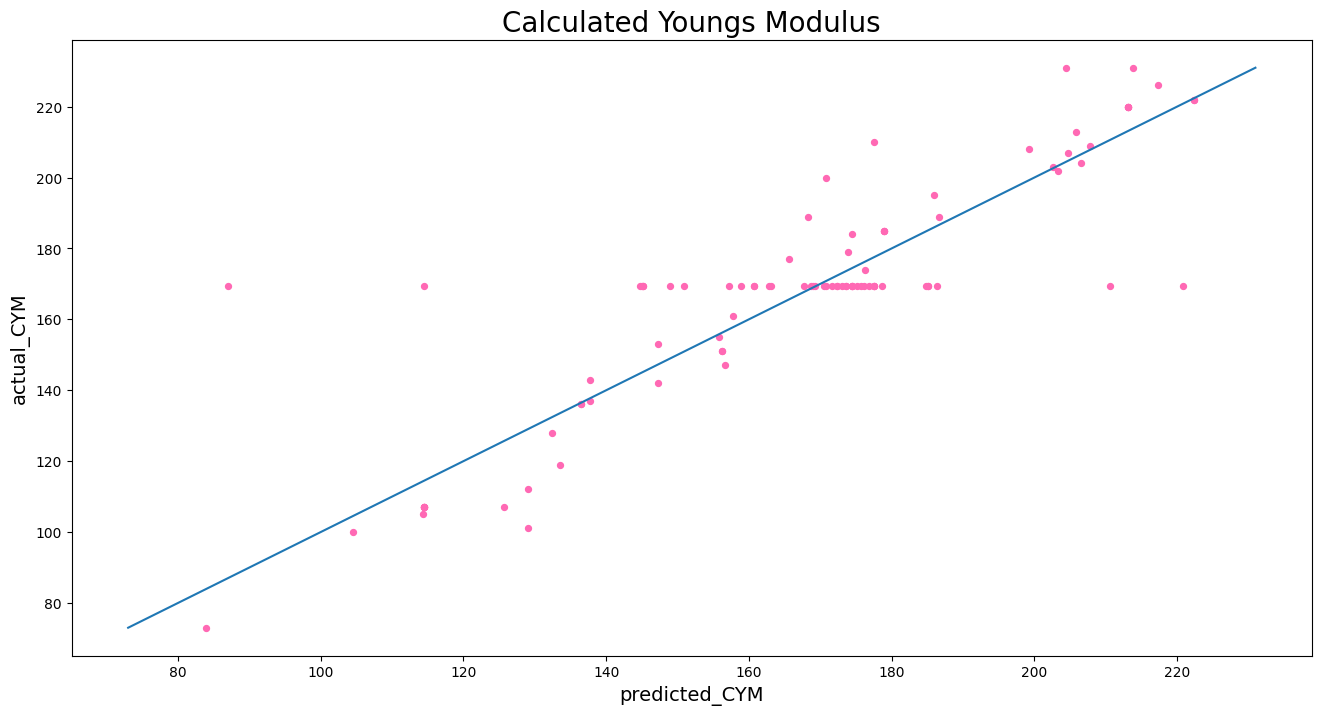

In [252]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Calculated_Young_modulus, actual_Calculated_Youngs_Modulus, color = 'hotpink', s=18)
x_max = max(GB_Calculated_Young_modulus.max(), actual_Calculated_Youngs_Modulus.max())
x_min = min(GB_Calculated_Young_modulus.min(), actual_Calculated_Youngs_Modulus.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Calculated Youngs Modulus', fontsize = 20)
ax0.set_xlabel('predicted_CYM', fontsize = 14)
ax0.set_ylabel('actual_CYM', fontsize = 14)
plt.show()